In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
#Read in the csv file and convert to a Pandas dataframe
player=pd.read_csv('/content/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
player.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
player.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [7]:
#profile_report = player.profile_report(
   # explorative=True, html={"style": {"full_width": True}}
#)
#profile_report

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
#Data Source: in the kaggle page (https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data)
#Open Access to data (opne source data are publicly accessible)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
#Data collection occurred for the seasons 2021-2022 and 2022-2023., addressing business problems.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# i have data from one sources so no need to check consistency

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [8]:
#Delete unrelevent columns, this column not relevent to busniss statment and have alot null value so can change analysis data
player.drop(['player'],axis=1,inplace=True)

In [9]:
player.drop(['minutes played'],axis=1,inplace=True)

In [10]:
player.drop(['position_encoded'],axis=1,inplace=True)

In [11]:
player.drop(['days_injured'],axis=1,inplace=True)

In [12]:
player.drop(['winger'],axis=1,inplace=True)

In [13]:
player.shape

(10754, 17)

In [ ]:
#goalkeepers = player[player['position'] == 'Goalkeeper']
#player = player[player['position'] != 'Goalkeeper']



In [14]:
player.drop(['goals conceded'],axis=1,inplace=True)

In [15]:
player.drop(['clean sheets'],axis=1,inplace=True)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [16]:
# check
player.duplicated().sum()

0

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [17]:
#Display number missing values per column
player.isnull().sum().sort_values(ascending= False)

,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0
second yellow cards,0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
# check outliers

In [18]:
fig = px.histogram(player, x='highest_value', title='Histogram of highest_value')
fig.update_layout(xaxis_title='highest_value')
fig.show()

In [ ]:
player["highest_value"].describe()

count    1.075400e+04
mean     6.152606e+06
std      1.338988e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64

In [19]:
player=player[
    (player['highest_value'] < 5.000000e+07) & (player['highest_value'] > 4.900000e+05)
]

In [20]:
player.shape

(7727, 15)

In [21]:
fig = px.histogram(player, x='current_value', title='Histogram of current_value')
fig.update_layout(xaxis_title='current_value')
fig.show()

In [22]:
player=player[
    (player['current_value'] <= 3.000000e+07) & (player['current_value'] > 5.00000e+05)
]

In [23]:
player.shape

(6063, 15)

In [24]:
fig = px.histogram(player, x='age', title='Histogram of age')
fig.update_layout(xaxis_title='age')
fig.show()

In [25]:
player=player[
    (player['age'] <40) & (player['age'] > 17)
]

In [26]:
fig = px.histogram(player, x='appearance', title='Histogram of appearance')
fig.update_layout(xaxis_title='appearance')
fig.show()

In [27]:
player=player[
    (player['appearance'] <= 100) & (player['appearance'] > 1)
]

In [28]:
fig = px.histogram(player, x='award', title='Histogram of award')
fig.update_layout(xaxis_title='award')
fig.show()

In [29]:
player=player[
    (player['award'] <= 20)
]

In [30]:
player.shape

(5909, 15)

In [31]:
categorical_features = ['team', 'name', 'position']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards'
                    ,'games_injured','award','current_value','highest_value']

# Bivariate/Multivariate Analysis:

### As we can observe, the high values for Attack - Second Striker and Midfield - Attacking Midfield positions are due to their roles on the field and their higher goal-scoring rates. Positions like Attack - Second Striker and Midfield - Attacking Midfield have higher average values because of their significant contribution to scoring and creating opportunities.

In [32]:
import plotly.express as px

#mean of current value
position_avg_value = player.groupby('position')['current_value'].mean().reset_index()
#create bar char
fig = px.bar(position_avg_value, x='position', y='current_value',
             title='Bar Chart of Position vs Average Current Value',
             labels={'position': 'Position', 'current_value': 'Average Current Value'})
fig.update_layout(xaxis_title='Position', yaxis_title='Average Current Value')
fig.show()



### Southampton FC represents the club with the highest total market value of players among the top five clubs. The other clubs have close percentages, indicating a general balance in the market values of players across these teams

In [33]:
import plotly.express as px

# culculate the total of current value in all plyer in teame
top_team = player.groupby('team')['current_value'].sum().nlargest(5).reset_index()
#creeat pie chart
fig = px.pie(top_team, values='current_value', names='team', title='Top 5 team by Total Player Current Value')
fig.update_traces(textinfo='percent+label')
fig.show()


### This plot shows a strong relationship between the current value and the highest value, as well as a clustering of points at lower values.

In [34]:
# scatter to show relation between highest_value and current_value
fig = px.scatter(player, x='highest_value', y='current_value',
                 title='Scatter Plot of Current Value vs Highest Value',
                 labels={'highest_value': 'Highest Value', 'current_value': 'Current Value'})
fig.show()

#  2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [35]:
categorical_features

['team', 'name', 'position']

In [36]:
numeric_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'games_injured',
 'award',
 'current_value',
 'highest_value']

In [37]:

player['position_numeric'] = pd.factorize(player['position'])[0]
player

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,games_injured,award,current_value,highest_value,position_numeric
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,58,1,1500000,22000000,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,84,4,600000,6000000,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,0.000000,19,10,15000000,35000000,1
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0,0.000000,169,7,2000000,20000000,1
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,13,0,2000000,2000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10692,Sydney FC,Joe Lolley,Attack-RightWinger,179.0,30.0,58,0.166256,0.193966,0.083128,0.0,0.027709,33,0,1800000,8000000,7
10718,Adelaide United,Craig Goodwin,Attack-LeftWinger,183.0,31.0,55,0.449902,0.332536,0.136927,0.0,0.000000,1,3,1500000,1500000,6
10729,Western Sydney Wanderers,Marcelo,Defender Centre-Back,191.0,36.0,47,0.091347,0.022837,0.251205,0.0,0.045674,2,5,800000,9000000,1
10736,Western Sydney Wanderers,Morgan Schneiderlin,midfield-DefensiveMidfield,186.0,33.0,36,0.107399,0.107399,0.268496,0.0,0.053699,42,5,1500000,30000000,4


In [38]:
player.dtypes

,0
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64
second yellow cards,float64


In [39]:
player.head(3)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,games_injured,award,current_value,highest_value,position_numeric
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.000000,0.069018,0.0,0.0,58,1,1500000,22000000,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.000000,0.000000,0.0,0.0,84,4,600000,6000000,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.0,0.032901,0.115153,0.0,0.0,19,10,15000000,35000000,1


#### 3. Feature selection

In [61]:
df = player[['appearance', 'goals','position_numeric']]

In [78]:
df.head()

,appearance,goals,position_numeric
1,15,0.0,0
2,4,0.0,0
6,70,0.0,1
7,8,0.0,1
8,34,0.0,1


#### 4. Prepare train and test data

In [62]:
# Prepare data
X = df

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_scaled.shape

(5909, 3)

In [64]:

wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


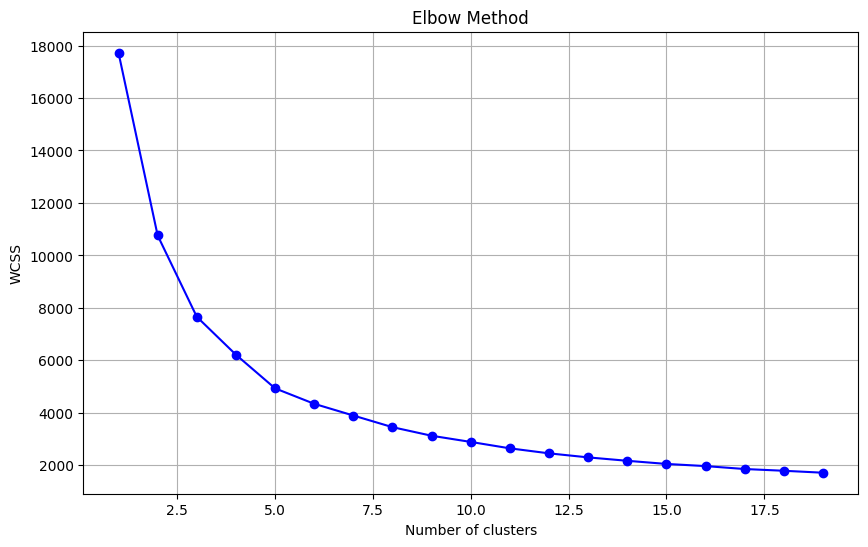

In [65]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [74]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

Train and Test the Model


In [75]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

Evaluating the Model


In [76]:
X.head(2)


,appearance,goals,position_numeric
1,15,0.0,0
2,4,0.0,0


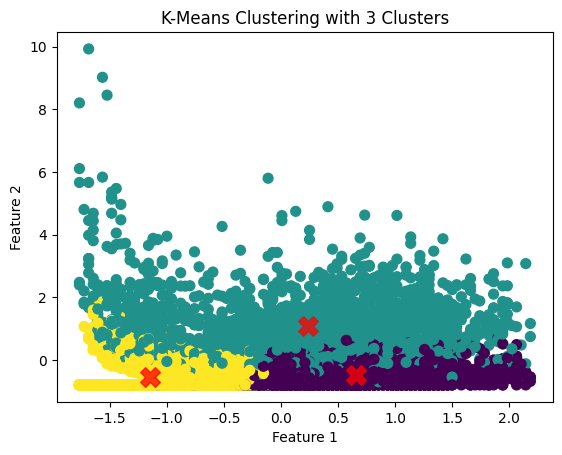

In [77]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [79]:
X['kmeans'] = y_pred


In [80]:
X['kmeans'].value_counts()


,count
kmeans,
0,2313
1,1879
2,1717


In [81]:
X[X['kmeans']==0]


,appearance,goals,position_numeric,kmeans
6,70,0.000000,1,0
10,89,0.012619,2,0
13,60,0.000000,3,0
15,76,0.096010,4,0
17,74,0.144046,5,0
...,...,...,...,...
10661,48,0.086894,4,0
10662,44,0.031612,5,0
10682,58,0.053721,3,0
10687,63,0.133655,5,0


<Axes: xlabel='appearance', ylabel='goals'>

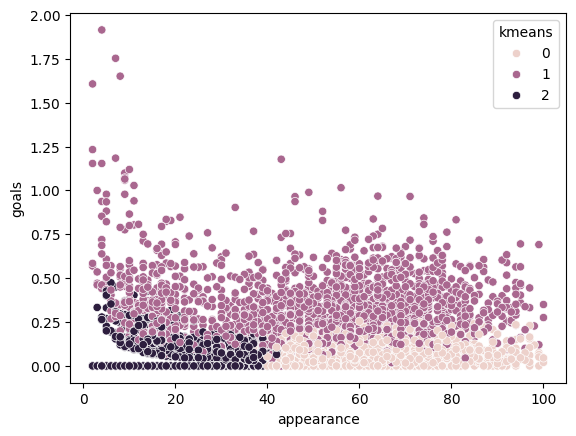

In [87]:
sns.scatterplot(data = X , x = 'appearance', y = 'goals', hue = 'kmeans')


<Axes: xlabel='position_numeric', ylabel='goals'>

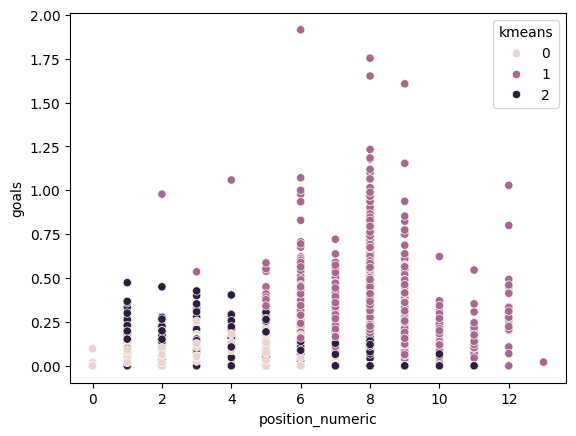

In [88]:
sns.scatterplot(data = X , x = 'position_numeric', y = 'goals', hue = 'kmeans')

<Axes: xlabel='position_numeric', ylabel='appearance'>

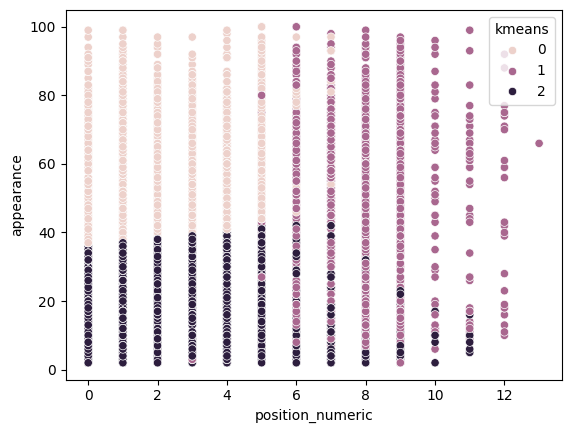

In [89]:
sns.scatterplot(data = X , x = 'position_numeric', y = 'appearance', hue = 'kmeans')


In [92]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='position_numeric', y='appearance', z='goals',
              color='kmeans')
fig.show()